In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


sns.set(rc={'figure.figsize':(15,10)})


In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


/Users/csuarezgurruchaga/opt/anaconda3/envs/no_supervisado/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/csuarezgurruchaga/opt/anaconda3/envs/no_supervisado/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/csuarezgurruchaga/opt/anaconda3/envs/no_supervisado/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/csuarezgurruchaga/opt/anaconda3/envs/no_supervisado/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


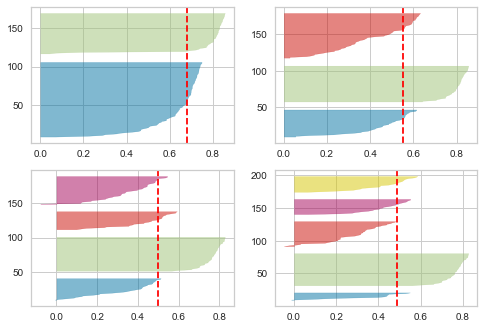

In [3]:
from yellowbrick.cluster import SilhouetteVisualizer

sil_scores = []
bic_score = []
inertia_score = []
sil_scores_km = []
fig, ax = plt.subplots(2, 2)
                       
for n_clust in np.arange(2,6):
    gmm = GaussianMixture(n_components=n_clust, random_state=1203).fit(iris.iloc[:,:4])
    sil_scores.append(silhouette_score(iris.iloc[:,:4],gmm.predict(iris.iloc[:,:4])))
    bic_score.append(gmm.bic(iris.iloc[:,:4]))
    
    km = KMeans(n_clusters=n_clust, random_state=1203).fit(iris.iloc[:,:4])
    sil_scores_km.append(silhouette_score(iris.iloc[:,:4],km.predict(iris.iloc[:,:4])))
    inertia_score.append(km.inertia_)
    
    q, mod = divmod(n_clust, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(iris.iloc[:,:4]);

##### Ensayamos kmeans para el dataset IRIS con ncluster = 2,3,4,5.

- **Observamos que para nclusters(5), no todos los clusters logran alcanzar el silhouette_score promedio, con lo cual queda descartado, ademas observamos unas densidades de clusters bastante heterogeneas.**

- **Observamos que para nclusters(4), las densidades de los clusters son bastante distintas, ademas que el cluster 4, apenas y logra alcanzar el silhoutte_score promedio.**

- **Observamos que las mejores alternativas son nclusters(2 y 3), en donde para 2 clusters, tenemos el mejor silhoutte_score promedio, pero vemos que el cluster 2, es bastante mas denso que el cluster 1. Para 3 clusters, tenemos un menor silhoutte_score promedio, pero las densidades son mas homogeneas que el caso anterior, ademas que en ambos casos, todos los clusters alcanzan el valor promedio de silhoutte_score.**

For n_clusters = 2 The average silhouette_score is : 0.434381904121559
For n_clusters = 3 The average silhouette_score is : 0.434381904121559
For n_clusters = 4 The average silhouette_score is : 0.434381904121559
For n_clusters = 5 The average silhouette_score is : 0.434381904121559
For n_clusters = 6 The average silhouette_score is : 0.434381904121559


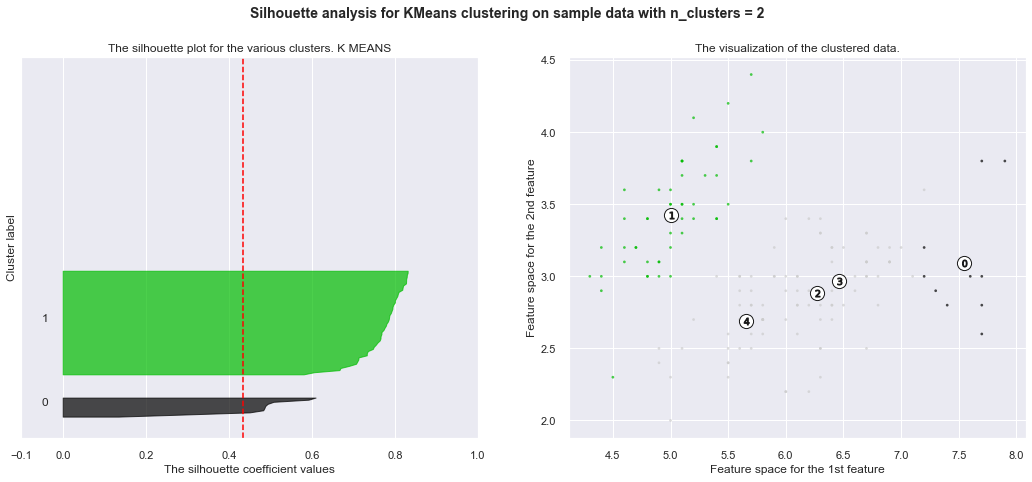

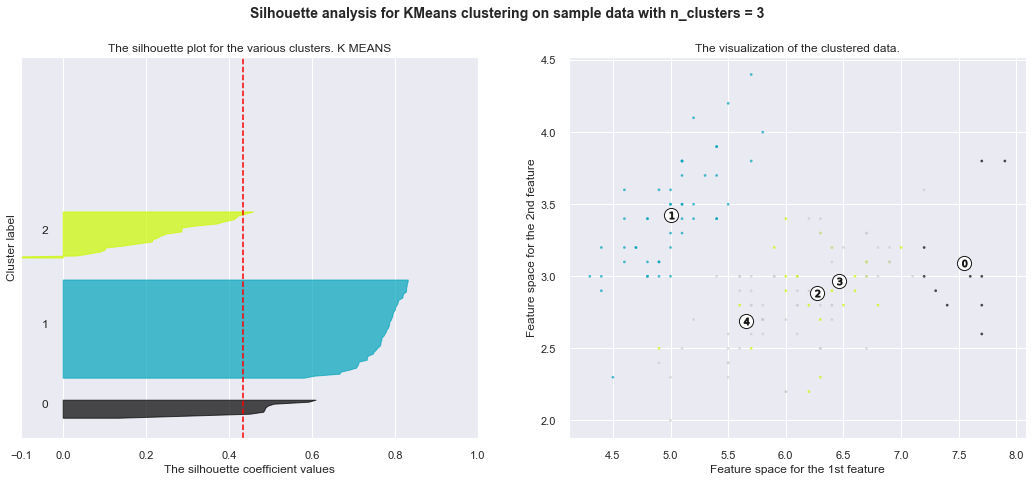

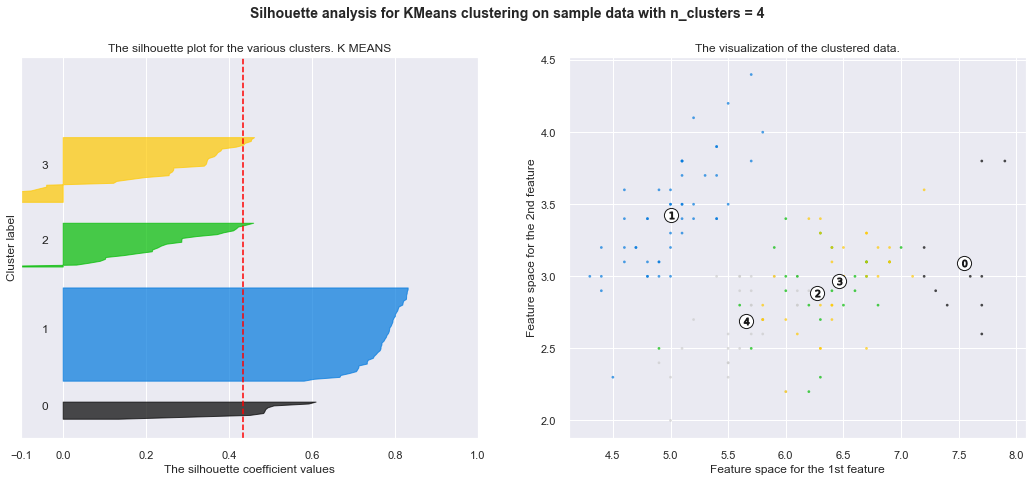

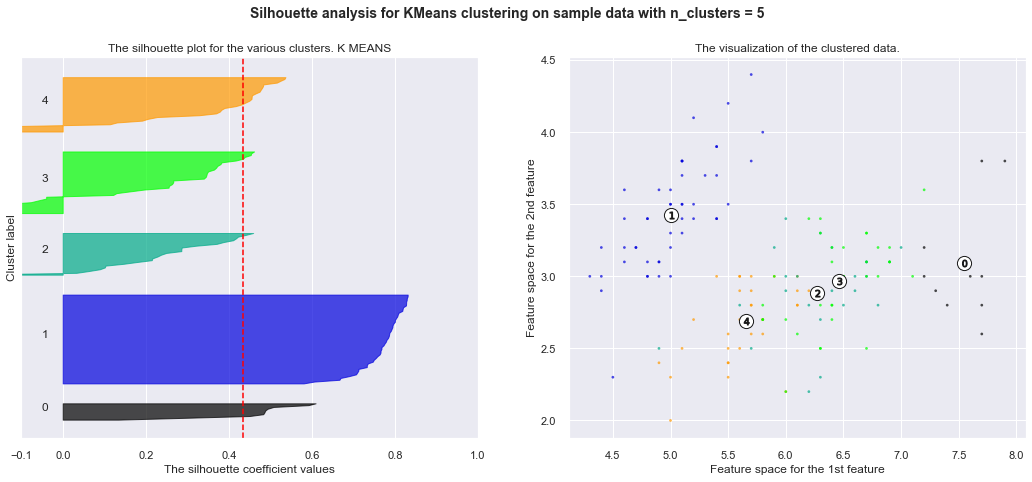

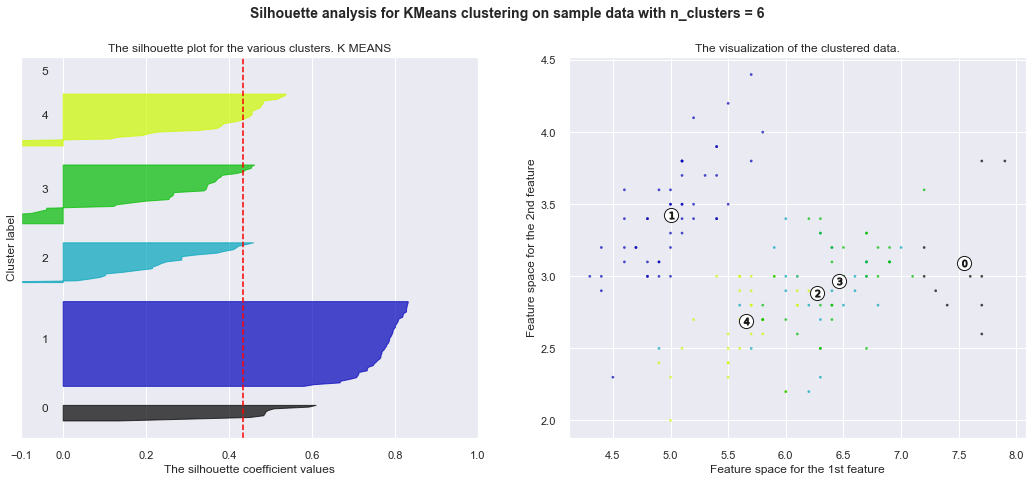

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = np.array(iris.iloc[:,:4])

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clust, random_state=1203)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters. K MEANS")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.means_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.434381904121559
For n_clusters = 3 The average silhouette_score is : 0.434381904121559
For n_clusters = 4 The average silhouette_score is : 0.434381904121559
For n_clusters = 5 The average silhouette_score is : 0.434381904121559
For n_clusters = 6 The average silhouette_score is : 0.434381904121559


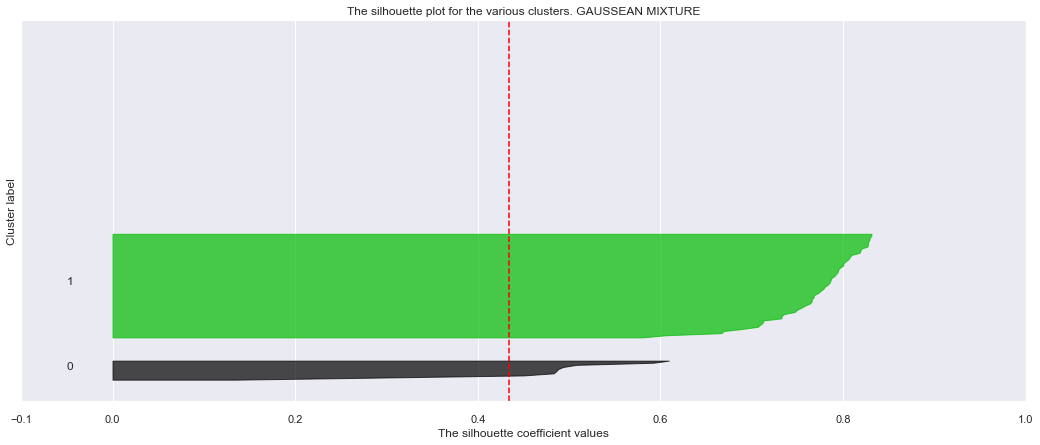

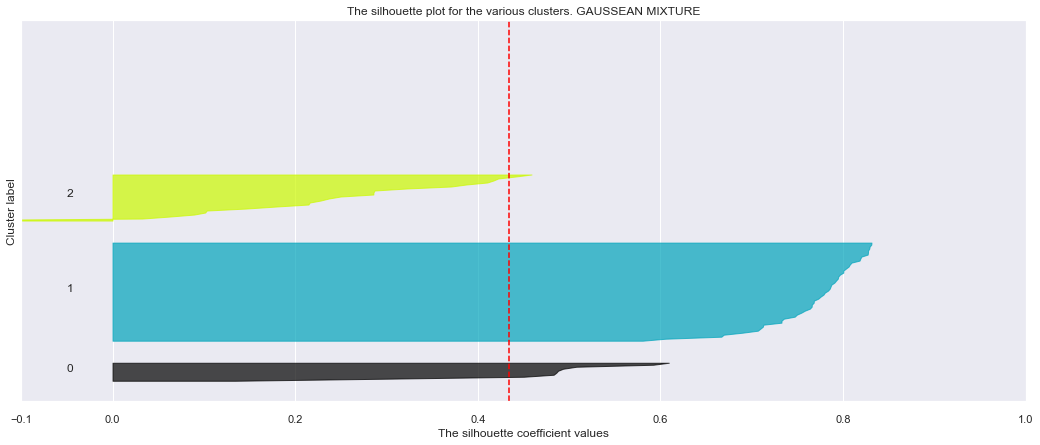

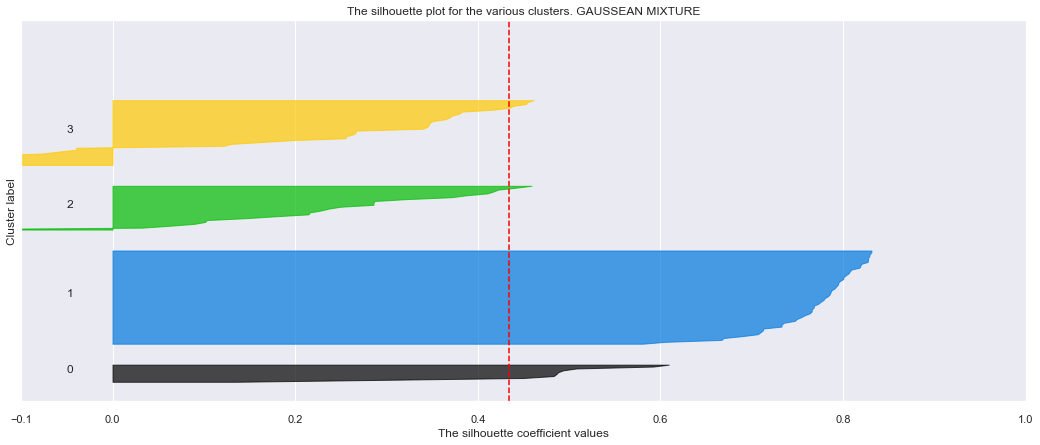

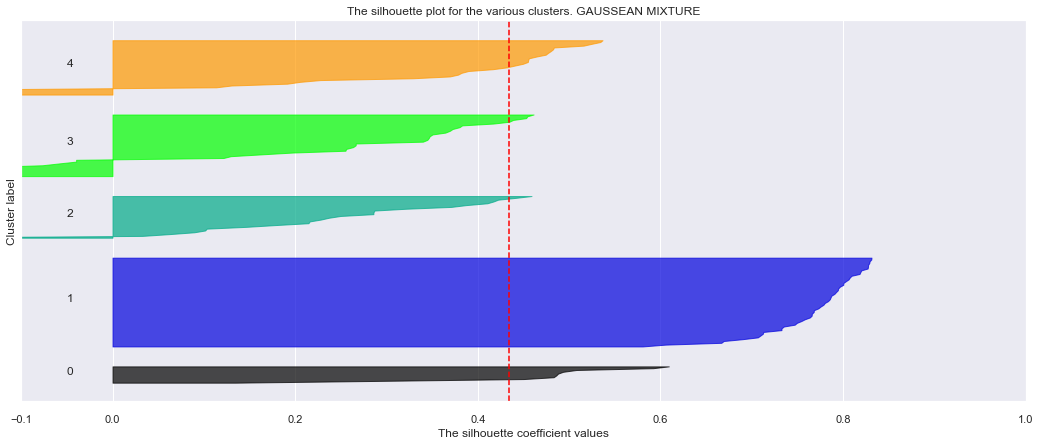

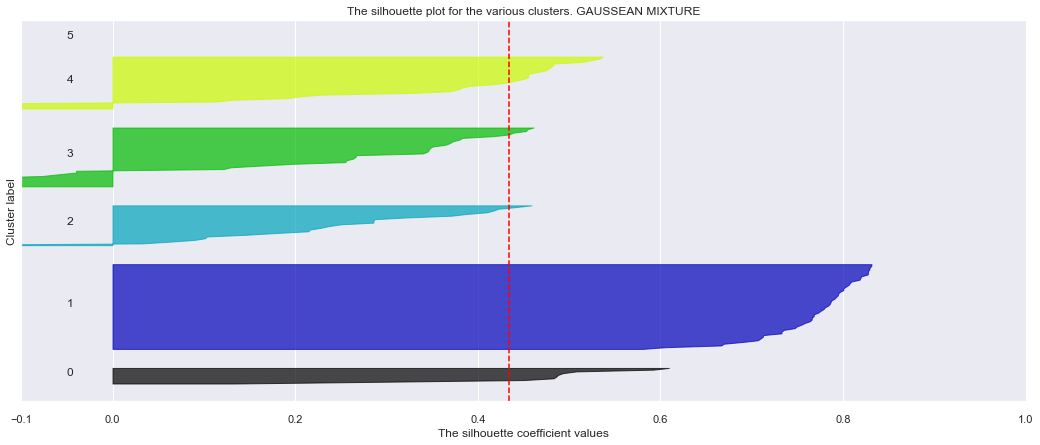

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = np.array(iris.iloc[:,:4])

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clust, random_state=1203)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters. GAUSSEAN MIXTURE")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

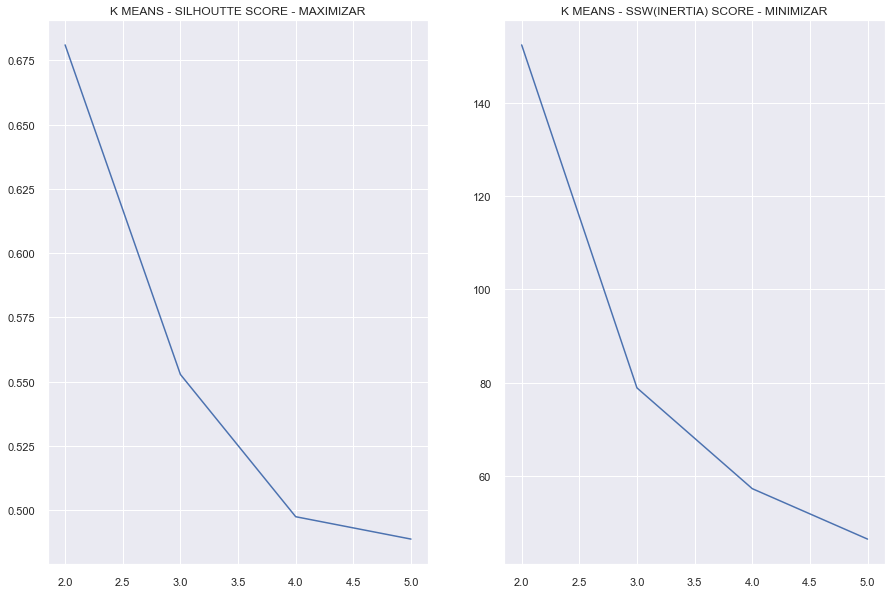

In [10]:
fig, ax2 = plt.subplots(1, 2)

ax2[0].set_title('K MEANS - SILHOUTTE SCORE - MAXIMIZAR')
ax2[1].set_title('K MEANS - SSW(INERTIA) SCORE - MINIMIZAR')
sns.lineplot(x = np.linspace(2,5,4),y = sil_scores_km, ax = ax2[0])
sns.lineplot(x = np.linspace(2,5,4),y = inertia_score, ax = ax2[1]);


Yo quiero maximizar el Silhoutte_score, por lo que los mejores valores de cluster estan entre 2 y 3.

Yo quiero minimizar la varianza intra clusters, por lo que el mejor valor de SSW esta entre 3 y 4, dsp sigue bajando, pero ya no tiene sentido, seguir dividiendo los datos.

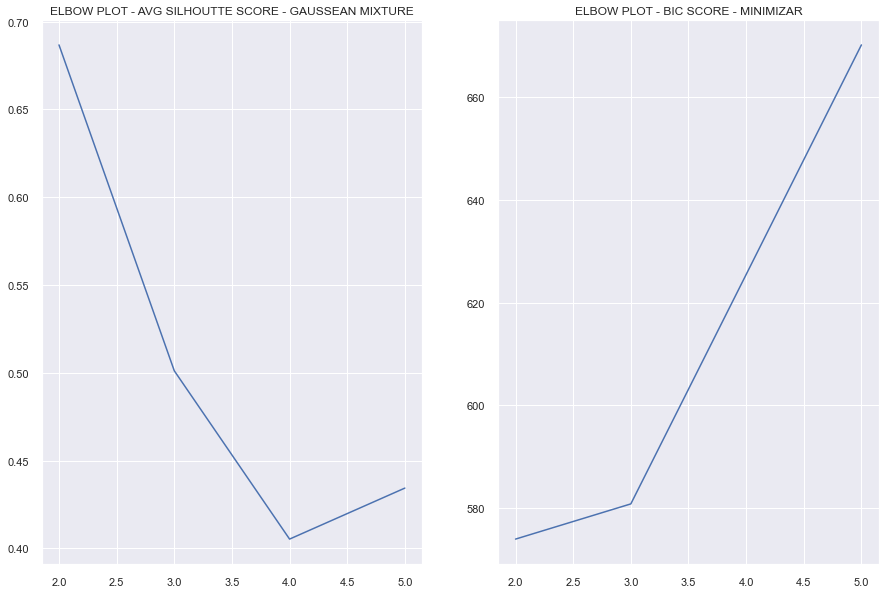

In [11]:
fig2, ax3 = plt.subplots(1, 2)

sns.lineplot(x = np.linspace(2,5,4),y = sil_scores, ax = ax3[0])
sns.lineplot(x = np.linspace(2,5,4),y = bic_score, ax = ax3[1]);

ax3[0].set_title('ELBOW PLOT - MEAN SILHOUTTE SCORE - GAUSSEAN MIXTURE')
ax3[1].set_title('ELBOW PLOT - BIC SCORE - MINIMIZAR');

Yo quiero minimizar el BIC, por lo que los mejores valores de cluster estan entre 2 y 3.

Yo quiero maximizar el silhoutte score, por lo que los mejores valores de cluster estan entre 2 y 3.